In [1]:
import ee
import geemap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Initialize the library.
ee.Initialize()

## Configuration

In [3]:
LABEL_DICT = {'built': 6, 'water': 0, 'tree': 1, 'grass': 2, 'flooded_veg': 3, 'crop': 4, 
             'shrub': 5, 'bare': 7}#, 'snow': 8}
COLOR_DICT = {'built': '#C4281B', 'water': '#419BDF', 'tree': '#397D49', 'grass': '#88B053', 
              'flooded_veg': '#7A87C6', 'crop': '#E49635', 
             'shrub': '#DFC35A', 'bare': '#A59B8F'}#, 'snow': '#B39FE1'}

In [4]:
csv_file = 'DBR_Excel_data_pro.csv'

## Load bridge info

In [5]:
df = pd.read_csv(csv_file)

In [6]:
df.head()

,Unnamed: 0,S.No,Bridge_No,Bridge_Name,Bridge_Type,Bridge_Span,River_Name,Trail_Type,District,Major_VDC,...,State,Ward_No,Latitude,Longitude,Const_Year,Local_Fund,Foreign_Agency,Bridge Condition,start_year,end_year
0,0,1,01 5 002 18 06 01,Jogi Rumba,D,50,Sobuwa khola,Local,Taplejung,Hangdewa,...,1,NaN,27.377915,87.697766,2005/06,VDC,SDC,No action required,2005,2006
1,1,2,01 5 002 18 06 02,Dhupaure,ST,32,Dhupaure Khola,Local,Taplejung,Hangdewa,...,1,NaN,27.364250,87.708946,1999/2000,Other,KAABGN,No action required,1999,2000
2,2,3,01 5 003 18 06 04,Mauwa Khola,D,60.5,Mauwa Khola,Main,Taplejung,Phuurumbu,...,1,NaN,27.413410,87.720686,2004/05,Other,KAABGN,No action required,2004,2005
3,3,4,01 5 003 18 06 05,Gopani,D,50,Gopani Khola,Local,Taplejung,Phuurumbu,...,1,NaN,27.398313,87.731395,2007/08,VDC,DRILP+SDC/DFID,No action required,2007,2008
4,4,5,01 5 004 18 06 01,Thouwa,D,37,Sisne Khola,Local,Taplejung,Limkhim,...,1,NaN,27.428107,87.713575,1998/99,VDC,SDC,No action required,1998,1999


take one bridge as example

In [7]:
df.loc[6000]

Unnamed: 0                        7804
S.No                              7805
Bridge_No           04 3 0803 18 06 11
Bridge_Name             Simtada (LSTB)
Bridge_Type                         LD
Bridge_Span                        165
River_Name                 Thuli Bheri
Trail_Type                       Local
District                 Western Rukum
Major_VDC             Aathbiskot Na Pa
Major Palika          Aathbiskot Na Pa
State                                0
Ward_No                            NaN
Latitude                     28.825828
Longitude                    82.381146
Const_Year                   2019/2020
Local_Fund                         NaN
Foreign_Agency                    SWAp
Bridge Condition    No action required
start_year                        2019
end_year                          2020
Name: 6000, dtype: object

In [8]:
bridge = df.loc[6000]

## Convert/download class map as array

* randomly pick one dynamic world fullfill the filter criterias
* return its class map as array (for further analysis & visualization)

In [61]:
def getArray(lon, lat, year, distance=1000):
    # creat point
    point = ee.Geometry.Point(lon, lat)
    
    # creat buffer as geometry
    geometry = point.buffer(distance=distance)
    
    # define time range (annual)
    startDate = '{}-01-01'.format(year)
    endDate = '{}-01-01'.format(int(year)+1)
    
    # select S2 and corresponding DW
    s2 = ee.ImageCollection('COPERNICUS/S2_HARMONIZED').filterDate(startDate, 
                            endDate).filterBounds(geometry).filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 35))
    s2Image = ee.Image(s2.first())
    imageId = s2Image.get('system:index').getInfo()
    dw = ee.ImageCollection('GOOGLE/DYNAMICWORLD/V1').filter(ee.Filter.eq('system:index', imageId))
    dwImage = ee.Image(dw.first())
    classification = dwImage.select('label')
    
    # convert to np.array
    rgb_img = geemap.ee_to_numpy(classification, region=geometry)
    print(rgb_img.shape)
    
    # visualize
    plt.imshow(rgb_img)
    plt.title('Image {} for bridge built on year {} at ({}, {})'.format(imageId, year, lon, lat))
    plt.show()
    
    return rgb_img

In [10]:
lat, lon = bridge['Latitude'], bridge['Longitude']
start_year, end_year = bridge['start_year'], bridge['end_year']

(200, 200, 1)


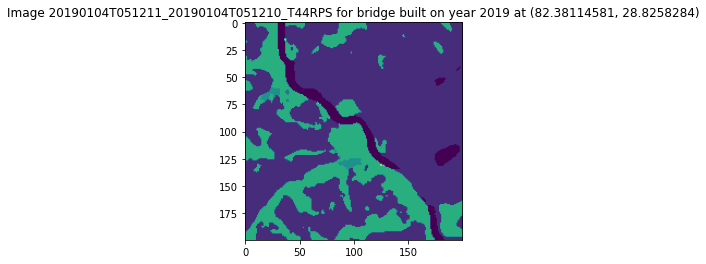

In [62]:
rgb_img = getArray(lon, lat, start_year)

In [63]:
np.unique(rgb_img)

array([0, 1, 3, 4, 5, 7, 8])